**Athletes**

In [2]:
# Import necessary libraries
import pandas as pd

# File path
file_path = "C:/Users/sreev/Data Visualization/Olympics 2024/athletes.csv"  # Replace with the correct file path

# Load the dataset
try:
    athletes_df = pd.read_csv(file_path)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading the file: {e}")

# Display basic information about the dataset
print("\nDataset Information:")
print(athletes_df.info())

# Preview the first few rows
print("\nFirst 5 rows:")
print(athletes_df.head())


Data loaded successfully!

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11113 non-null  int64  
 1   current             11113 non-null  bool   
 2   name                11113 non-null  object 
 3   name_short          11110 non-null  object 
 4   name_tv             11110 non-null  object 
 5   gender              11113 non-null  object 
 6   function            11113 non-null  object 
 7   country_code        11113 non-null  object 
 8   country             11113 non-null  object 
 9   country_long        11113 non-null  object 
 10  nationality         11110 non-null  object 
 11  nationality_long    11110 non-null  object 
 12  nationality_code    11110 non-null  object 
 13  height              11110 non-null  float64
 14  weight              11108 non-null  float64
 15  disci

**Data Preprocessing**

In [3]:
# Handle missing values
athletes_df['height'] = athletes_df['height'].fillna(athletes_df['height'].mean())  # Fill missing height with mean
athletes_df['weight'] = athletes_df['weight'].fillna(athletes_df['weight'].mean())  # Fill missing weight with mean
athletes_df['birth_date'] = pd.to_datetime(athletes_df['birth_date'], errors='coerce')  # Convert birth_date to datetime
athletes_df['age'] = 2024 - athletes_df['birth_date'].dt.year  # Calculate age
athletes_df['age'] = athletes_df['age'].fillna(athletes_df['age'].mean()).astype(int)  # Fill missing age

# Handle categorical columns
athletes_df['gender'] = athletes_df['gender'].fillna('Unknown')  # Fill missing gender with "Unknown"

# Drop irrelevant or sparse columns
irrelevant_cols = ['nickname', 'ritual', 'hobbies', 'philosophy', 'other_sports', 'influence']
athletes_df = athletes_df.drop(columns=irrelevant_cols)

# Inspect the cleaned dataset
print("\nCleaned Dataset Information:")
print(athletes_df.info())
print("\nPreview of Cleaned Data:")
print(athletes_df.head())



Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   code                11113 non-null  int64         
 1   current             11113 non-null  bool          
 2   name                11113 non-null  object        
 3   name_short          11110 non-null  object        
 4   name_tv             11110 non-null  object        
 5   gender              11113 non-null  object        
 6   function            11113 non-null  object        
 7   country_code        11113 non-null  object        
 8   country             11113 non-null  object        
 9   country_long        11113 non-null  object        
 10  nationality         11110 non-null  object        
 11  nationality_long    11110 non-null  object        
 12  nationality_code    11110 non-null  object        
 13  height          

**Gender Distribution**

C:\Users\sreev\AppData\Local\Temp\ipykernel_23192\3668154980.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=athletes_df, x='gender', palette='Set2')


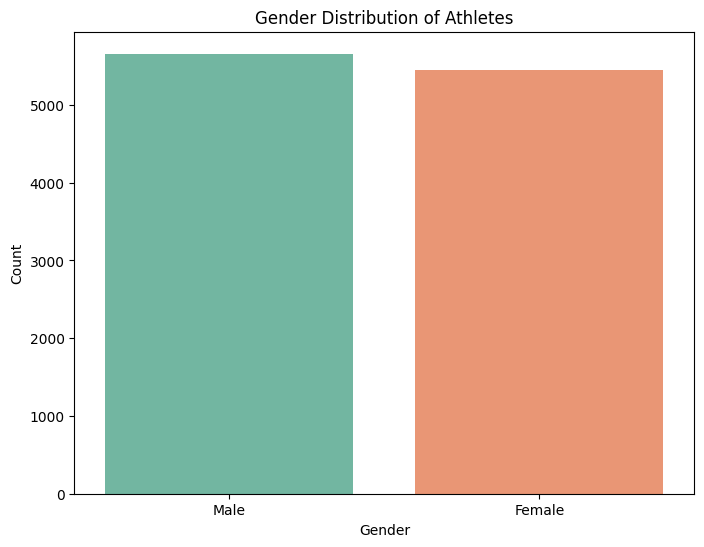

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=athletes_df, x='gender', palette='Set2')
plt.title("Gender Distribution of Athletes")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


**Age Distribution**

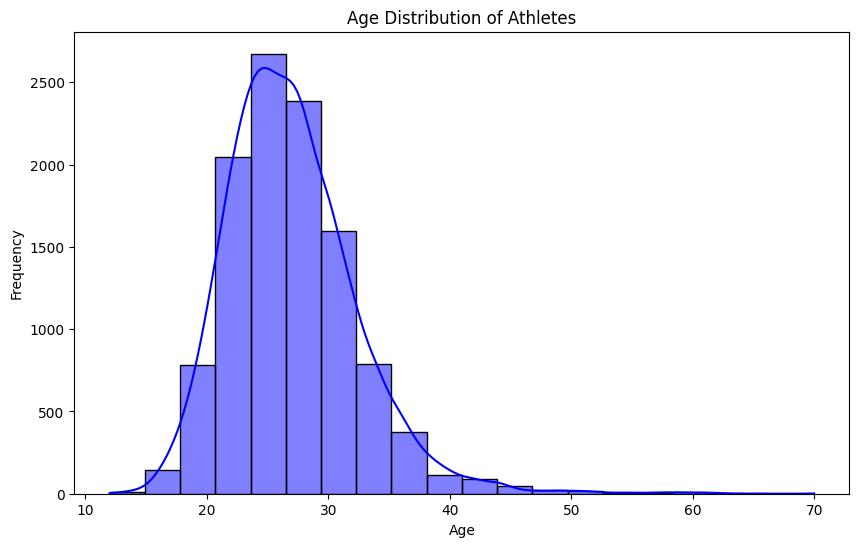

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(athletes_df['age'], kde=True, bins=20, color='blue')
plt.title("Age Distribution of Athletes")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


C:\Users\sreev\AppData\Local\Temp\ipykernel_23192\1609959158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')


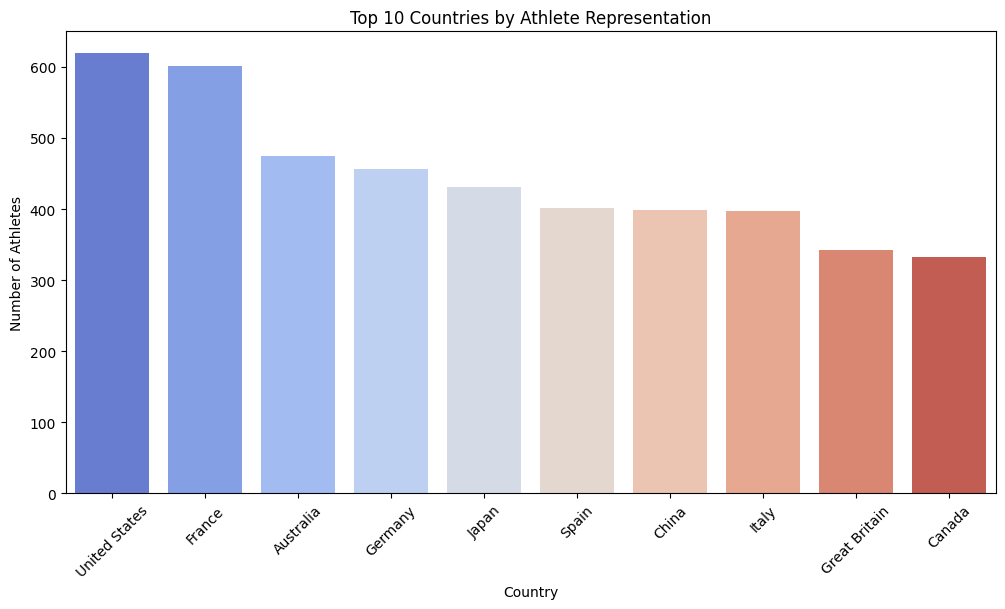

In [6]:
top_countries = athletes_df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title("Top 10 Countries by Athlete Representation")
plt.xlabel("Country")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=45)
plt.show()


C:\Users\sreev\AppData\Local\Temp\ipykernel_23192\1705303040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_disciplines.index, y=top_disciplines.values, palette='viridis')


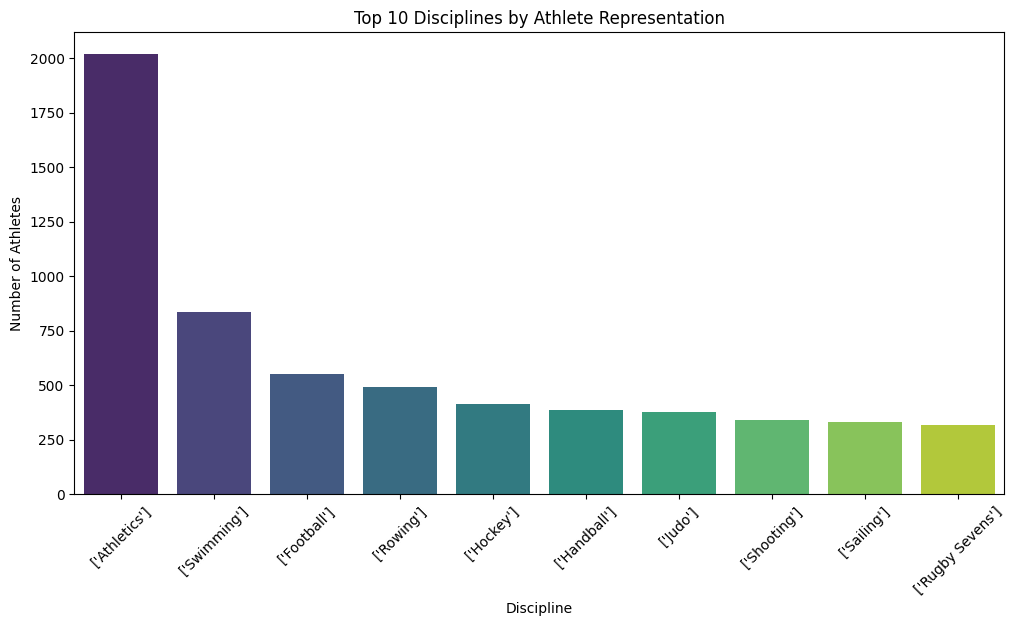

In [7]:
top_disciplines = athletes_df['disciplines'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_disciplines.index, y=top_disciplines.values, palette='viridis')
plt.title("Top 10 Disciplines by Athlete Representation")
plt.xlabel("Discipline")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=45)
plt.show()


C:\Users\sreev\AppData\Local\Temp\ipykernel_23192\2230969359.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


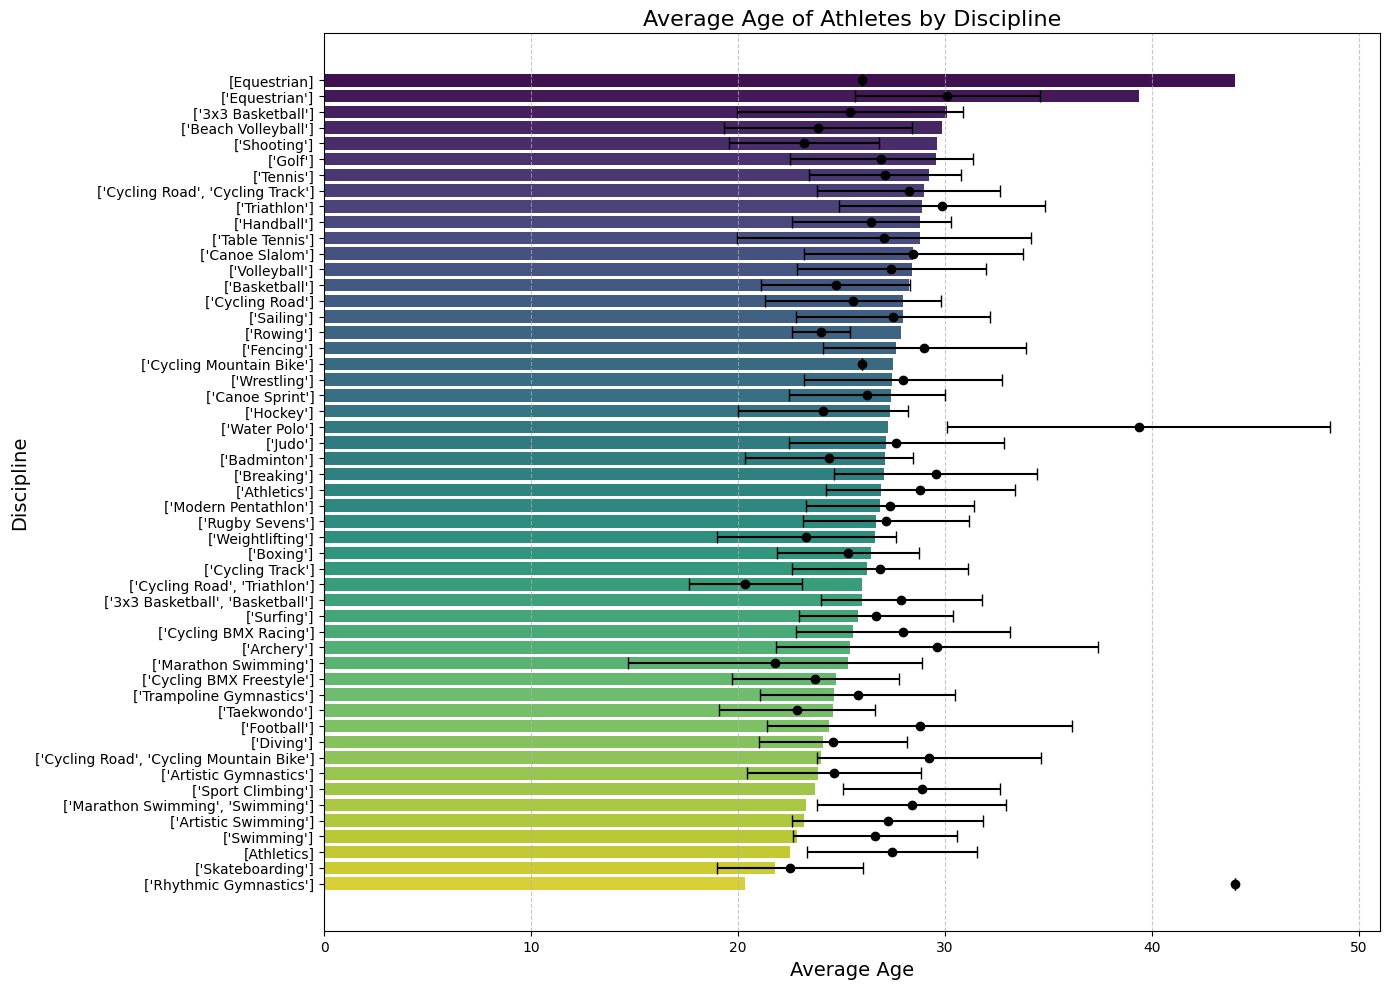

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by discipline and calculate mean and std for age
discipline_age_stats = athletes_df.groupby('disciplines')['age'].agg(['mean', 'std']).reset_index()

# Sort by mean age for better visualization
discipline_age_stats = discipline_age_stats.sort_values(by='mean', ascending=False)

# Ensure 'std' column has no NaN values for plotting
discipline_age_stats['std'] = discipline_age_stats['std'].fillna(0)

# Plotting the average age with error bars (standard deviation)
plt.figure(figsize=(14, 10))
sns.barplot(
    x='mean',
    y='disciplines',
    data=discipline_age_stats,
    palette='viridis',
    errorbar=None  # Remove error bars to avoid dimension issues
)

# Add error bars manually using Matplotlib
for i, row in discipline_age_stats.iterrows():
    plt.errorbar(
        x=row['mean'], 
        y=i, 
        xerr=row['std'], 
        fmt='o', 
        color='black', 
        capsize=4
    )

# Customizing the plot
plt.title("Average Age of Athletes by Discipline", fontsize=16)
plt.xlabel("Average Age", fontsize=14)
plt.ylabel("Discipline", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


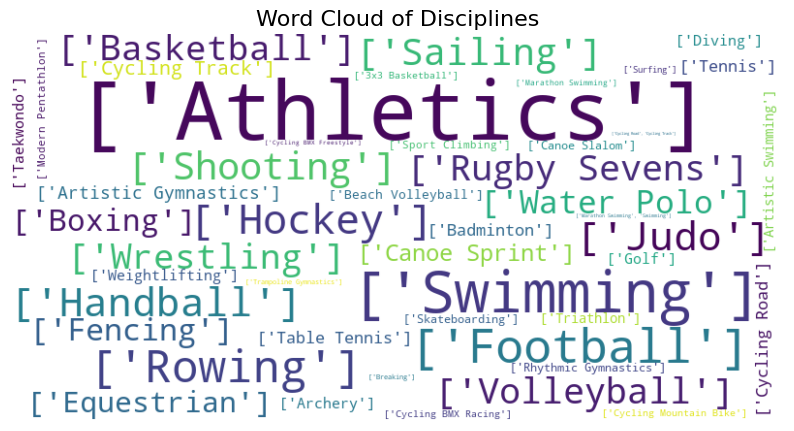

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from discipline names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    athletes_df['disciplines'].value_counts().to_dict()
)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Disciplines", fontsize=16)
plt.show()


In [13]:
import plotly.express as px

# Filter top 10 disciplines by representation
top_disciplines = athletes_df['disciplines'].value_counts().head(10).index
filtered_df = athletes_df[athletes_df['disciplines'].isin(top_disciplines)]

# Create parallel categories plot
fig = px.parallel_categories(
    filtered_df,
    dimensions=['age_group', 'gender', 'disciplines'],
    title="Parallel Categories: Age Group, Gender, and Top Disciplines",
    color='age',  # Use age for color
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update layout for better readability
fig.update_layout(
    title_font_size=16,
    title_x=0.5,  # Center title
    font=dict(size=12),
    margin=dict(l=50, r=50, t=50, b=50)  # Reduce padding
)

fig.show()


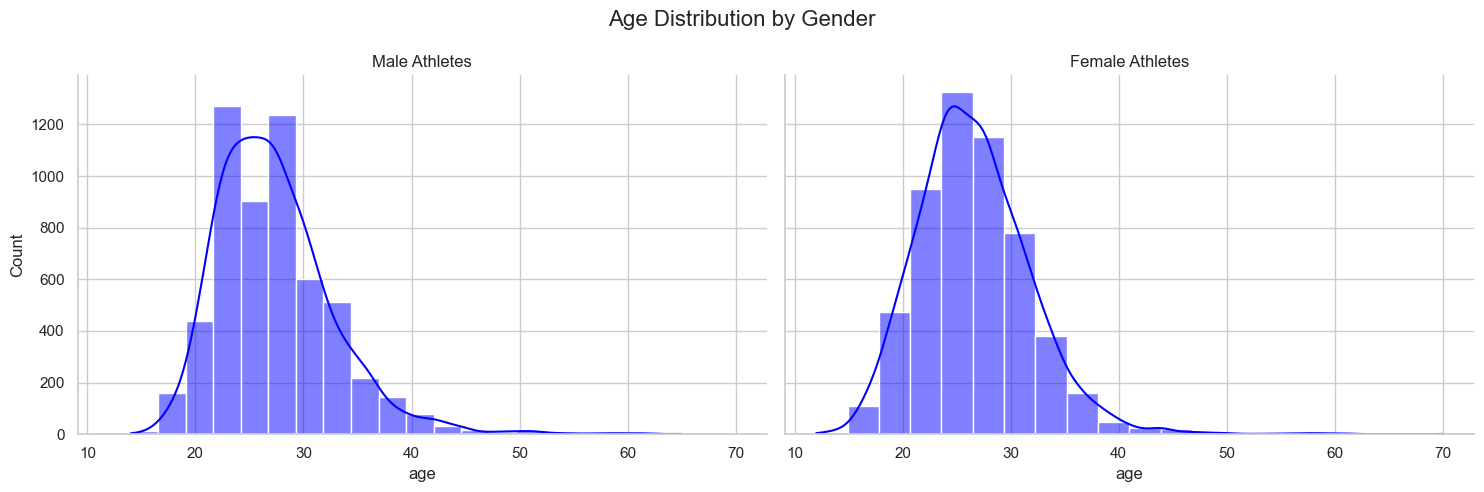

In [11]:
sns.set(style="whitegrid")
g = sns.FacetGrid(athletes_df, col="gender", height=5, aspect=1.5, palette="Set2")
g.map(sns.histplot, "age", kde=True, bins=20, color='blue')
g.set_titles("{col_name} Athletes")
g.fig.suptitle("Age Distribution by Gender", fontsize=16)
g.fig.subplots_adjust(top=0.85)
plt.show()


In [12]:
import plotly.graph_objects as go

# Pivot table to calculate average age by discipline and country
heatmap_data = athletes_df.pivot_table(index='disciplines', columns='country', values='age', aggfunc='mean')

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis',
    colorbar=dict(title="Average Age")
))
fig.update_layout(
    title="Heatmap of Average Age by Discipline and Country",
    xaxis_title="Country",
    yaxis_title="Discipline"
)
fig.show()
